<a href="https://colab.research.google.com/github/jerryorajekwe/Predicting-Loan-Default-Risk-with-Machine-Learning-Models/blob/main/loandefaultworkings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for preprocessing and imputation
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Libraries for model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For handling imbalanced data
from imblearn.over_sampling import SMOTE

# Additional utilities
from collections import Counter

In [3]:
# Load the dataset
loan_data = pd.read_csv('/content/drive/MyDrive/loan.csv', low_memory=False)

In [4]:
# 30% random sample
loan_data_sample = loan_data.sample(frac=0.3, random_state=42)

In [5]:
# Save the sampled dataset
loan_data_sample.to_csv('loan_data_sample.csv', index=False)

In [6]:
# Display information about the sampled dataset
print("Sampled Dataset Information:")
loan_data_sample.info()

Sampled Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 678200 entries, 1758049 to 2038627
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 755.4+ MB


In [7]:
print("First 5 Rows of the Dataset:")
loan_data_sample.head()

First 5 Rows of the Dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1758049,NaN,NaN,35000,35000,35000.0,36 months,12.12,1164.51,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
686533,NaN,NaN,30000,30000,30000.0,60 months,10.75,648.54,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
900721,NaN,NaN,15000,15000,15000.0,36 months,7.49,466.53,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1727912,NaN,NaN,24000,24000,24000.0,60 months,21.15,651.31,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
539691,NaN,NaN,14400,14400,14400.0,36 months,8.59,455.18,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Table 1: Descriptive Statistics:")
loan_data_sample.describe().round(2)

Table 1: Descriptive Statistics:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,678200.00,678200.00,678200.00,678200.00,678200.00,678199.00,0.0,677684.00,...,3120.0,3120.00,3120.0,3120.00,2484.00,3120.00,3120.00,9997.00,9997.00,9997.00
mean,NaN,NaN,15063.79,15058.51,15040.42,13.10,446.30,77946.48,NaN,18.85,...,3.0,151.33,3.0,13.77,444.48,11385.30,194.32,5028.51,47.83,13.09
std,NaN,NaN,9189.32,9187.32,9191.01,4.83,267.19,74649.50,NaN,14.53,...,0.0,125.54,0.0,9.75,366.31,7421.83,201.58,3699.03,7.13,8.07
min,NaN,NaN,500.00,500.00,0.00,5.31,15.69,0.00,NaN,-1.00,...,3.0,1.61,3.0,0.00,10.17,193.98,0.01,107.00,0.45,0.00
25%,NaN,NaN,8000.00,8000.00,8000.00,9.49,251.98,46000.00,NaN,11.91,...,3.0,57.76,3.0,5.00,171.97,5531.34,43.69,2240.75,45.00,6.00
50%,NaN,NaN,13000.00,13000.00,12875.00,12.62,378.59,65000.00,NaN,17.85,...,3.0,116.40,3.0,15.00,344.52,9919.18,128.99,4179.00,45.00,14.00
75%,NaN,NaN,20000.00,20000.00,20000.00,15.99,593.82,93000.00,NaN,24.50,...,3.0,208.74,3.0,23.00,609.23,15698.72,286.32,6831.00,50.00,18.00
max,NaN,NaN,40000.00,40000.00,40000.00,30.99,1717.63,10999200.00,NaN,999.00,...,3.0,893.63,3.0,31.00,2680.89,40149.35,1275.36,30000.00,184.36,50.00


In [9]:
# Get all features
features = loan_data_sample.columns.tolist()
print("All Features:", features)

# Separate numerical and categorical features
numerical_features = loan_data_sample.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = loan_data_sample.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

All Features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il

In [10]:
# List of columns to drop
columns_to_drop = [
    'id', 'member_id', 'url', 'desc', 'title', 'zip_code',
    'addr_state', 'pymnt_plan', 'policy_code', 'hardship_flag',
    'debt_settlement_flag', 'debt_settlement_flag_date',
    'settlement_status', 'settlement_date', 'settlement_amount',
    'settlement_percentage', 'settlement_term'
]

# Drop the columns
loan_data_sample = loan_data_sample.drop(columns=columns_to_drop)

# Save the cleaned dataset
loan_data_sample.to_csv('loan_data_cleaned.csv', index=False)

In [11]:
# Display information about the cleaned dataset
print("Cleaned Dataset Information:")
loan_data_sample.info()

Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 678200 entries, 1758049 to 2038627
Columns: 128 entries, loan_amnt to disbursement_method
dtypes: float64(99), int64(3), object(26)
memory usage: 667.5+ MB


In [12]:
# Number of duplicate records
loan_data_sample.duplicated().sum()

np.int64(0)

In [13]:
# Missing values in each column
loan_data_sample.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
...,...
hardship_loan_status,675080
orig_projected_additional_accrued_interest,675716
hardship_payoff_balance_amount,675080
hardship_last_payment_amount,675080


In [14]:
# Drop columns with high missing values
threshold = 0.5
columns_to_drop = loan_data_sample.columns[loan_data_sample.isnull().mean() > threshold]
loan_data_sample = loan_data_sample.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount']


In [15]:
# Fill missing values for numerical columns
num_cols = loan_data_sample.select_dtypes(include=['float64', 'int64']).columns
loan_data_sample[num_cols] = loan_data_sample[num_cols].fillna(loan_data_sample[num_cols].median())

In [16]:
# Fill missing values for categorical columns
cat_cols = loan_data_sample.select_dtypes(include=['object']).columns
loan_data_sample[cat_cols] = loan_data_sample[cat_cols].fillna('Unknown')

In [17]:
# Save the dataset after handling missing values
loan_data_sample.to_csv('loan_data_cleaned.csv', index=False)

print("Missing values handled and dataset saved!")

Missing values handled and dataset saved!


In [18]:
# Compute correlation matrix for numerical features
corr_matrix = loan_data_sample.select_dtypes(include=['float64', 'int64']).corr().round(2)

# Convert to a neatly formatted DataFrame
corr_table = pd.DataFrame(corr_matrix)

# Display correlation values in a structured format
print("Feature Correlation Table:")
display(corr_table.style.set_table_attributes("style='display:inline'").set_caption("Table 1: Feature Correlation Matrix"))


Feature Correlation Table:


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,1.000000,1.000000,0.100000,0.950000,0.300000,0.040000,-0.010000,-0.030000,0.180000,-0.060000,0.310000,0.100000,0.200000,0.470000,0.470000,0.650000,0.650000,0.580000,0.580000,0.070000,0.120000,0.110000,0.320000,-0.020000,-0.000000,-0.020000,0.310000,-0.020000,0.030000,0.010000,0.020000,-0.000000,0.130000,-0.070000,-0.030000,-0.020000,0.310000,0.000000,0.320000,-0.000000,0.070000,0.010000,0.000000,0.230000,0.210000,0.050000,-0.000000,0.000000,0.120000,0.160000,0.060000,0.030000,0.220000,0.040000,0.000000,-0.050000,0.190000,0.150000,0.210000,0.190000,0.080000,0.160000,0.160000,0.150000,0.180000,-0.000000,0.000000,-0.020000,-0.030000,0.080000,0.020000,-0.080000,0.010000,0.330000,0.270000,0.370000,0.210000
funded_amnt,1.000000,1.000000,1.000000,0.100000,0.950000,0.300000,0.040000,-0.010000,-0.030000,0.180000,-0.060000,0.310000,0.100000,0.200000,0.470000,0.470000,0.650000,0.650000,0.580000,0.580000,0.070000,0.120000,0.110000,0.320000,-0.020000,-0.000000,-0.020000,0.310000,-0.020000,0.030000,0.010000,0.020000,-0.000000,0.130000,-0.070000,-0.030000,-0.020000,0.310000,0.000000,0.320000,-0.000000,0.070000,0.010000,0.000000,0.230000,0.210000,0.050000,-0.000000,0.000000,0.120000,0.170000,0.060000,0.030000,0.220000,0.040000,0.000000,-0.050000,0.190000,0.150000,0.210000,0.190000,0.080000,0.160000,0.160000,0.150000,0.180000,-0.000000,0.000000,-0.020000,-0.030000,0.080000,0.020000,-0.080000,0.010000,0.330000,0.270000,0.370000,0.210000
funded_amnt_inv,1.000000,1.000000,1.000000,0.100000,0.940000,0.300000,0.050000,-0.010000,-0.030000,0.180000,-0.060000,0.310000,0.100000,0.200000,0.470000,0.470000,0.650000,0.650000,0.580000,0.580000,0.070000,0.120000,0.110000,0.320000,-0.020000,-0.000000,-0.020000,0.310000,-0.020000,0.030000,0.010000,0.020000,-0.000000,0.130000,-0.070000,-0.030000,-0.020000,0.310000,0.000000,0.320000,-0.000000,0.070000,0.020000,0.000000,0.230000,0.210000,0.050000,-0.000000,0.000000,0.120000,0.170000,0.060000,0.030000,0.220000,0.040000,0.000000,-0.050000,0.190000,0.150000,0.210000,0.190000,0.080000,0.160000,0.160000,0.150000,0.180000,-0.000000,0.000000,-0.020000,-0.030000,0.080000,0.020000,-0.080000,0.010000,0.330000,0.280000,0.370000,0.210000
int_rate,0.100000,0.100000,0.100000,1.000000,0.130000,-0.070000,0.120000,0.060000,0.190000,-0.010000,0.050000,-0.030000,0.260000,-0.040000,0.020000,0.020000,0.100000,0.100000,-0.030000,0.410000,0.070000,0.140000,0.130000,0.080000,0.020000,0.010000,0.010000,-0.080000,0.110000,0.020000,0.110000,0.120000,-0.080000,0.020000,0.110000,0.090000,0.100000,-0.050000,0.240000,-0.180000,0.110000,-0.000000,0.120000,0.170000,-0.080000,-0.290000,0.270000,0.010000,0.010000,-0.060000,-0.130000,-0.090000,-0.110000,-0.090000,-0.070000,-0.120000,0.050000,0.020000,0.080000,-0.060000,-0.080000,0.020000,-0.010000,-0.050000,0.080000,-0.010000,0.000000,0.010000,0.030000,0.180000,-0.080000,0.270000

In [19]:
# Define correlation threshold (e.g., 0.7)
threshold = 0.7

# Identify highly correlated features
high_corr_features = set()
for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if abs(corr_matrix.loc[i, j]) > threshold and i != j:
            high_corr_features.add(j)

# Drop the identified features
loan_data_sample = loan_data_sample.drop(columns=list(high_corr_features))
print(f"Dropped highly correlated features: {list(high_corr_features)}")


Dropped highly correlated features: ['tot_cur_bal', 'num_actv_bc_tl', 'total_pymnt_inv', 'open_rv_24m', 'installment', 'total_pymnt', 'percent_bc_gt_75', 'num_actv_rev_tl', 'num_op_rev_tl', 'total_bal_il', 'acc_open_past_24mths', 'num_rev_tl_bal_gt_0', 'total_bc_limit', 'total_rec_prncp', 'total_acc', 'open_il_24m', 'num_sats', 'num_bc_sats', 'open_rv_12m', 'revol_bal', 'open_il_12m', 'num_tl_30dpd', 'collection_recovery_fee', 'open_acc', 'total_il_high_credit_limit', 'revol_util', 'tot_hi_cred_lim', 'funded_amnt', 'out_prncp_inv', 'total_rev_hi_lim', 'num_tl_op_past_12m', 'recoveries', 'bc_open_to_buy', 'out_prncp', 'total_bal_ex_mort', 'bc_util', 'num_bc_tl', 'loan_amnt', 'funded_amnt_inv', 'acc_now_delinq', 'avg_cur_bal', 'num_rev_accts']


In [20]:
# Select numerical columns
numerical_vars = loan_data_sample.select_dtypes(include=['float64', 'int64']).columns

# Compute IQR for each numerical feature
Q1 = loan_data_sample[numerical_vars].quantile(0.25)  # First quartile
Q3 = loan_data_sample[numerical_vars].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Identify outliers beyond 1.5*IQR threshold
outlier_mask = ((loan_data_sample[numerical_vars] < (Q1 - 1.5 * IQR)) |
                (loan_data_sample[numerical_vars] > (Q3 + 1.5 * IQR)))

print("Number of outliers per feature:")
print(outlier_mask.sum())


Number of outliers per feature:
int_rate                       12209
annual_inc                     33032
dti                             6553
delinq_2yrs                   126618
inq_last_6mths                 28408
pub_rec                       107865
total_rec_int                  49216
total_rec_late_fee             25360
last_pymnt_amnt                97606
collections_12_mths_ex_med     11180
tot_coll_amt                  100315
open_acc_6m                    38541
open_act_il                   318143
mths_since_rcnt_il            146533
il_util                       282515
max_bal_bc                    134890
all_util                      138479
inq_fi                         51828
total_cu_tl                    82798
inq_last_12m                   79712
chargeoff_within_12_mths        5125
delinq_amnt                     2069
mo_sin_old_il_acct             36822
mo_sin_old_rev_tl_op           22071
mo_sin_rcnt_rev_tl_op          51678
mo_sin_rcnt_tl                 45711
mort_a

In [21]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (capping extreme 1% values)
for var in numerical_vars:
    loan_data_sample[var] = winsorize(loan_data_sample[var], limits=[0.01, 0.01])

print("Outliers successfully capped using Winsorization.")

Outliers successfully capped using Winsorization.


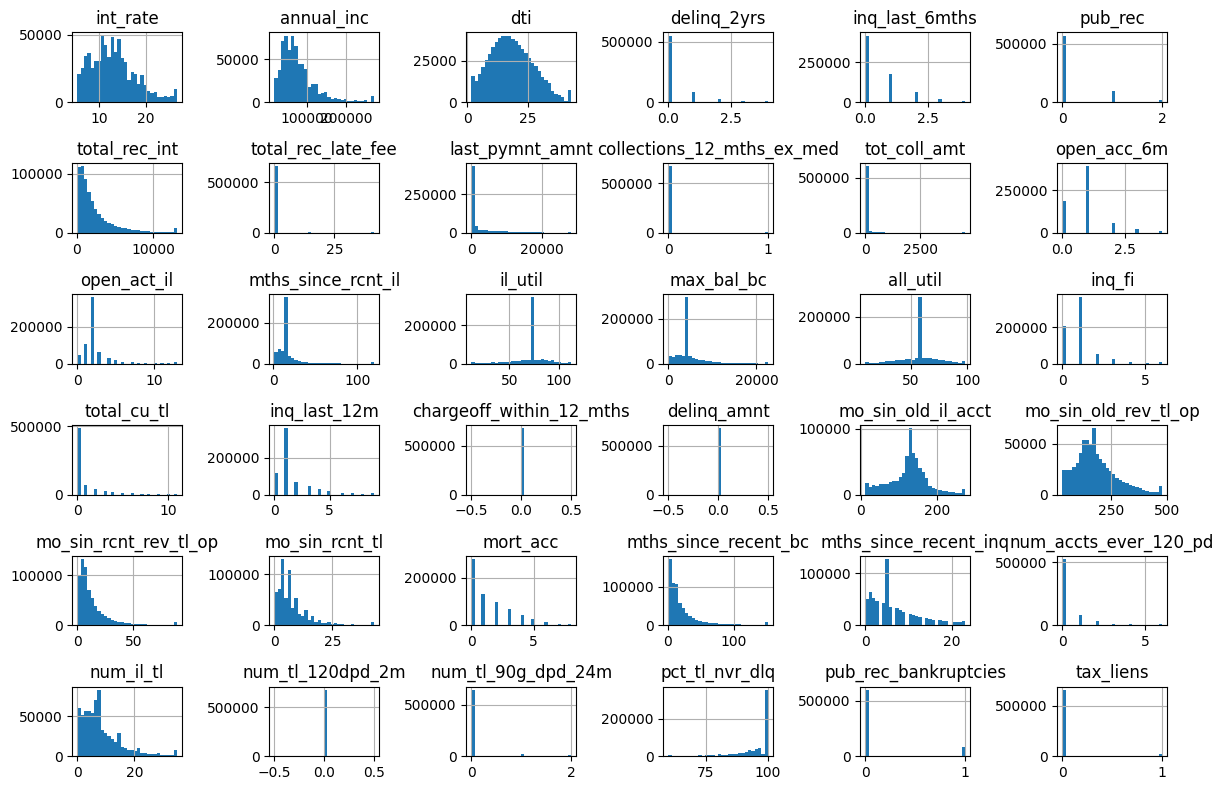

In [22]:
# Histogram of numerical features after outlier handling
loan_data_sample.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

In [23]:
# View the number of numerical and categorical features separately
print(f"Numerical Features: {loan_data_sample.select_dtypes(include=['float64', 'int64']).shape[1]}")
print(f"Categorical Features: {loan_data_sample.select_dtypes(include=['object']).shape[1]}")

Numerical Features: 36
Categorical Features: 16


In [25]:
# Mapping loan_status to binary classification
loan_data_sample['loan_status_binary'] = loan_data_sample['loan_status'].map({
    'Fully Paid': 1,
    'Current': 1,
    'Charged Off': 0,
    'Default': 0,
    'Late (31-120 days)': 0,
    'Late (16-30 days)': 0,
    'In Grace Period': 0,
    'Does not meet the credit policy. Status: Fully Paid': 1,
    'Does not meet the credit policy. Status: Charged Off': 0
})

# Verify transformation
print("Transformed Target Variable Distribution:")
print(loan_data_sample['loan_status_binary'].value_counts())


Transformed Target Variable Distribution:
loan_status_binary
1.0    588196
0.0     89172
Name: count, dtype: int64


In [26]:
# Define target variable
target = 'loan_status_binary'
X = loan_data_sample.drop(columns=[target])  # Features
y = loan_data_sample[target]  # Target

# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shape after splitting
print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")

Training Set Shape: (542560, 52), (542560,)
Test Set Shape: (135640, 52), (135640,)
